# 1. Logistic classifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [42]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [43]:
file_path = "./datasets/train.txt"
train = pd.read_csv(file_path, sep='\t', header=None, names=['LABEL', 'REVIEW'])
train

,LABEL,REVIEW
0,TRUTHFULPOSITIVE,The sheraton was a wonderful hotel! When me an...
1,TRUTHFULPOSITIVE,We stayed at the Omni between Christmas and Ne...
2,DECEPTIVENEGATIVE,I was REALLY looking forward to a nice relaxin...
3,TRUTHFULNEGATIVE,"First let me say, I try not to be too critical..."
4,DECEPTIVENEGATIVE,The Ambassador East Hotel is a terrible place ...
...,...,...
1395,TRUTHFULNEGATIVE,I stayed here for 5 nights last summer. I book...
1396,TRUTHFULPOSITIVE,Stayed here for 3 nights for a Bridgestone/Fir...
1397,TRUTHFULNEGATIVE,I am staying here now and actually am compelle...
1398,TRUTHFULNEGATIVE,We stayed at this hotel with our two teenage d...


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = train['REVIEW'].values
y = train['LABEL'].values

vectorizer = CountVectorizer()
vectorizer.fit(sentences)
X = vectorizer.transform(sentences)
print('X shape after vectorization', X.shape)

X shape after vectorization (1400, 8936)


In [45]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X, y)

LogisticRegression()

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(10, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kf)
print("Cross-validated Accuracy: {:.2f}% (+/- {:.2f}%)".format(scores.mean() * 100, scores.std() * 100))

Cross-validated Accuracy: 78.57% (+/- 4.60%)


Text(0.5, 1.0, 'Logistic Regression CM')

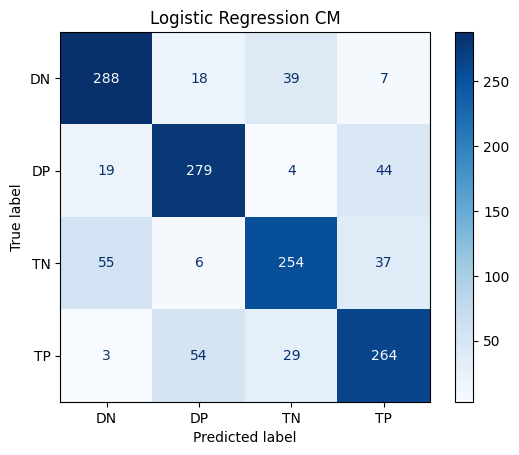

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['DN', 'DP', 'TN', 'TP'])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression CM")

# Creating test output

In [48]:
file_path = "./datasets/test_just_reviews.txt"
test = pd.read_csv(file_path, sep='\t', header=None, names=['REVIEW'])
test

,REVIEW
0,My family and I stayed here while we were visi...
1,WARNING! My stay at the Talbott Hotel will go ...
2,I recently stayed at the Hard Rock Hotel in Ch...
3,O.M.G best hotel ever ! i've stayed at various...
4,We became an Ambassador member just before spe...
...,...
195,The Millennium Knickerbocker Hotel has seen be...
196,We got a spanking deal at this hotel for $99 a...
197,Just back from a business trip. The Homewood i...
198,I have just returned from a lovely shopping tr...


In [49]:
X = vectorizer.transform(test['REVIEW'].values)
test['PREDICTION'] = classifier.predict(X)
test['PREDICTION']

0      DECEPTIVEPOSITIVE
1      DECEPTIVENEGATIVE
2      DECEPTIVEPOSITIVE
3       TRUTHFULPOSITIVE
4      DECEPTIVEPOSITIVE
             ...        
195    DECEPTIVENEGATIVE
196     TRUTHFULNEGATIVE
197     TRUTHFULPOSITIVE
198     TRUTHFULPOSITIVE
199     TRUTHFULNEGATIVE
Name: PREDICTION, Length: 200, dtype: object

In [50]:
test['PREDICTION'].to_csv('results/LogisticRegression.txt', header=None, index=None, mode='w')